| ISE-291   | Sec: 4 Group: 5            |
| --------- | -------------------------- |
| **ID**        | **Name**                       | 
| 202278220 | Alhassan Alhoodar     |    
| 202243220 | Abdullah Alhouty     |    
| 202183630 | Hassan Alhaji Mohammad     |  
| 202168030 | Ali Albahrani     |    
| 202181590 | Mohammad Alhajri     |  

**The meaning of the categories:**

FAVC	:	 Do you eat high caloric food frequently?	



FCVC	:	 Do you usually eat vegetables in your meals?



NCP		 :    How many main meals do you have daily?



CAEC	 :    Do you eat any food between meals?



SMOKE	:	 Do you smoke?		



CH2O	:	 How much water do you drink daily?	



SCC		 :    Do you monitor the calories you eat daily?	



FAF		:	 How often do you have physical activity?



TUE		:	 How much time do you use technological devices such as cell phone, videogames, television, computer and others?	





CALC	:     How often do you drink alcohol?		



MTRANS	:	 Which transportation do you usually use?



beyesdad:	 Obesity level	

## Data Selection


**Data Description** :

Data for estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records.


**Problem Description** :

Obesity is a medical condition characterized by excessive body fat accumulation that can lead to serious health problems. Therefore, it is essential to maintain a healthy weight through regular exercise and a balanced diet to prevent the onset of these dangerous conditions.


## Objective

To study the relationship between eating habits and physical condition, and distinguish by increasing obesity.



## Project Major Stages

**1- Manipulating the Data**

**2- Cleaning the data** 

**3- Model Planning**

**4- Model Building**

## **Manipulating the Data**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
display(df.head(5))
display(df.info())

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

None

In [3]:
#Generating outliars
np.random.seed(0)

num_samples = 10

col = 'Age' , 'Weight' 
col_1 ='FCVC' , 'NCP' , 'FAF' , 'TUE' , 'CH2O'
random_indices = np.random.choice(df.index, size=num_samples, replace=False)

df.loc[random_indices, col] = np.round(df.loc[random_indices, col] * 4)
df.loc[random_indices, col_1] = np.round(df.loc[random_indices, col_1])
m= df['Age'] >100
display(df.loc[m,:])

Age  Gender    Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  \
259   288.0  Female  1.670000  1456.0  Sometimes  yes   1.0  3.0  no    no   
717   284.0    Male  1.854706   948.0         no  yes   3.0  4.0  no    no   
966   468.0    Male  1.773656  1392.0         no  yes   2.0  4.0  no    no   
1325  664.0  Female  1.567973  1296.0  Sometimes  yes   2.0  3.0  no    no   
1557  460.0    Male  1.762887  1824.0  Sometimes  yes   2.0  3.0  no    no   
1585  400.0    Male  1.771510  1812.0  Sometimes  yes   1.0  3.0  no    no   
1730  488.0    Male  1.910672  2068.0  Sometimes  yes   2.0  3.0  no    no   
1815  300.0  Female  1.746652  2140.0  Sometimes  yes   3.0  3.0  no    no   
1850  416.0  Female  1.632896  1680.0  Sometimes  yes   3.0  3.0  no    no   
1911  292.0  Female  1.745602  2136.0  Sometimes  yes   3.0  3.0  no    no   

      CH2O family_history_with_overweight  FAF  TUE        CAEC  \
259    1.0                            yes  0.0  1.0  Frequently   
717    2.0                            yes  2.0  1.0   Sometimes   
966    1.0                             no  2.0  0.0   Sometimes   
1325   2.0                            yes  0.0  0.0   Sometimes   
1557   2.0                            yes  0.0  1.0   Sometimes   
1585   2.0                            yes  2.0  0.0   Sometimes   
1730   1.0                            yes  1.0  0.0   Sometimes   
1815   3.0                            yes  1.0  1.0   Sometimes   
1850   1.0                            yes  0.0  1.0   Sometimes   
1911   3.0                            yes  2.0  1.0   Sometimes   

                     MTRANS           NObeyesdad  
259   Public_Transportation       Obesity_Type_I  
717              Automobile  Insufficient_Weight  
966              Automobile   Overweight_Level_I  
1325             Automobile       Obesity_Type_I  
1557             Automobile      Obesity_Type_II  
1585  Public_Transportation      Obesity_Type_II  
1730  Public_Transportation      Obesity_Type_II  
1815  Public_Transportation     Obesity_Type_III  
1850  Public_Transportation     Obesity_Type_III  
1911  Public_Transportation     Obesity_Type_III

In [4]:
#Creating inconsistency
np.random.seed(0)
col = 'Height' 
num_samples = int(len(df) * 0.2)  
random_indices = np.random.choice(df.index, size=num_samples, replace=False)
df.loc[random_indices, col] = df.loc[random_indices, col] * 100
display(df.head(10))

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female  152.00    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   
5  29.0    Male    1.62    53.0   Sometimes  yes   2.0  3.0   no    no   2.0   
6  23.0  Female  150.00    55.0   Sometimes  yes   3.0  3.0   no    no   2.0   
7  22.0    Male    1.64    53.0   Sometimes   no   2.0  3.0   no    no   2.0   
8  24.0    Male    1.78    64.0  Frequently  yes   3.0  3.0   no    no   2.0   
9  22.0    Male  172.00    68.0          no  yes   2.0  3.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   
5                             no  0.0  0.0  Sometimes             Automobile   
6                            yes  1.0  0.0  Sometimes              Motorbike   
7                             no  3.0  0.0  Sometimes  Public_Transportation   
8                            yes  1.0  1.0  Sometimes  Public_Transportation   
9                            yes  1.0  1.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II  
5        Normal_Weight  
6        Normal_Weight  
7        Normal_Weight  
8        Normal_Weight  
9        Normal_Weight

In [5]:
# Making wrong datatype
df['Age']=df['Age'].apply(lambda x:str(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [6]:
# Generating some missing values
np.random.seed(0)

selected_columns = ["Age","Weight","FCVC","NCP","CH2O","FAF","TUE"]

for col in selected_columns:
    num_samples = int(len(df) * 0.1) 
    random_indices = np.random.choice(df.index, size=num_samples, replace=False)
    df.loc[random_indices, col] = np.nan

display(df.head(5))
display(df.info())

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female  152.00    56.0   Sometimes   no   3.0  NaN  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  NaN  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  NaN  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1900 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          1900 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            1900 non-null   float64
 7   NCP                             1900 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            1900 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             19

None

## **Cleaning the data**

In [7]:
# Missing values
# there are missing values in some collumns
# we fill them by the mean for numeric column and mode for object column

null_columns = df.columns[df.isna().any()]
for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]
    df[c].fillna(value,inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

None

In [8]:
# fixing inconsestancy
# some data like age must be integer, and other like weight should be
# but the main ones are the data which contain 0,1,2,3,4 like FAVC and FAF ...
# these numbers may represent label encoding, so they must be integer
df['Age']=df['Age'].apply(lambda x:float(x))
seleted_cols = df.loc[:,("Weight","FCVC","NCP","CH2O","FAF","TUE","Age")].columns
df[seleted_cols]=df[seleted_cols].applymap(lambda x: int(x))
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   int64  
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int64  
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

None

In [10]:
# Height column
# in this column, there are some errors as the height entered in cm rather than m
# so we will devide it by 100 cm

df["Height"] = df["Height"].apply(lambda x: x/100 if x > 2.5 else x)
df["Height"] = df["Height"].apply(lambda x: round(x,2))
df.head()

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0   21  Female    1.62      64          no   no     2    3   no    no     2   
1   21  Female    1.52      56   Sometimes   no     3    2  yes   yes     3   
2   23    Male    1.80      77  Frequently   no     2    3   no    no     2   
3   27    Male    1.80      87  Frequently   no     3    3   no    no     2   
4   22    Male    1.78      89   Sometimes   no     2    1   no    no     2   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes    0    1  Sometimes  Public_Transportation   
1                            yes    0    0  Sometimes  Public_Transportation   
2                            yes    2    1  Sometimes  Public_Transportation   
3                             no    2    0  Sometimes                Walking   
4                             no    0    0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

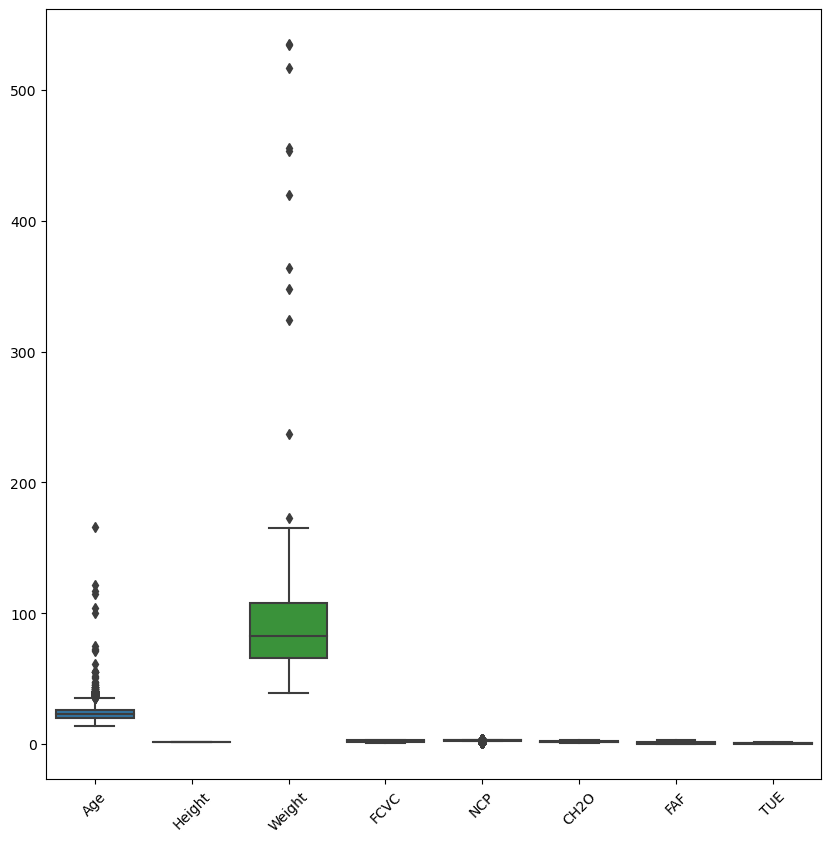

In [24]:
#Identify the outliers and fix it
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=45);

# There is outliers in wight and age

In [25]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to remove outliers from
columns = ['Age','Weight']

# Remove outliers
df = remove_outliers_iqr(df, columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1934 non-null   float64
 1   Gender                          1934 non-null   object 
 2   Height                          1934 non-null   float64
 3   Weight                          1934 non-null   float64
 4   CALC                            1934 non-null   object 
 5   FAVC                            1934 non-null   object 
 6   FCVC                            1934 non-null   float64
 7   NCP                             1934 non-null   float64
 8   SCC                             1934 non-null   object 
 9   SMOKE                           1934 non-null   object 
 10  CH2O                            1934 non-null   float64
 11  family_history_with_overweight  1934 non-null   object 
 12  FAF                             19

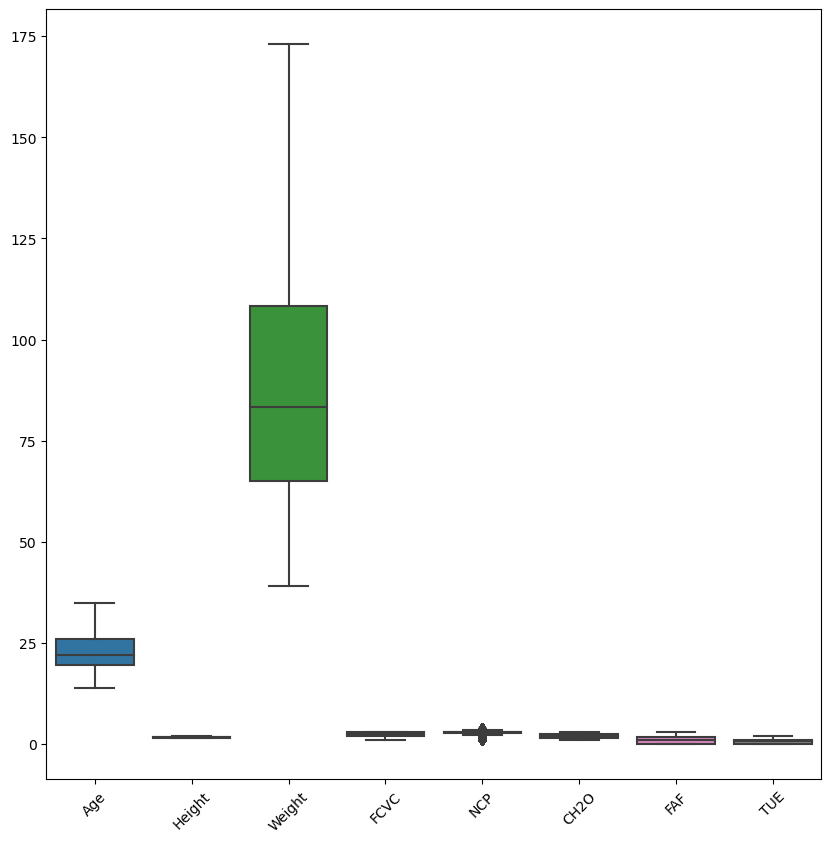

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=45);

#outliars are removed

In [27]:
# Display the cleaned data
display(df.head(5))
display(df.info())

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1934 non-null   float64
 1   Gender                          1934 non-null   object 
 2   Height                          1934 non-null   float64
 3   Weight                          1934 non-null   float64
 4   CALC                            1934 non-null   object 
 5   FAVC                            1934 non-null   object 
 6   FCVC                            1934 non-null   float64
 7   NCP                             1934 non-null   float64
 8   SCC                             1934 non-null   object 
 9   SMOKE                           1934 non-null   object 
 10  CH2O                            1934 non-null   float64
 11  family_history_with_overweight  1934 non-null   object 
 12  FAF                             19

None

## **Model Planing**

In [4]:
# Find the statistical summaries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


cat_columns= df.select_dtypes('object').columns
num_columns= df.select_dtypes(exclude='object').columns
display(df[cat_columns].describe())
display(df[num_columns].describe())

Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

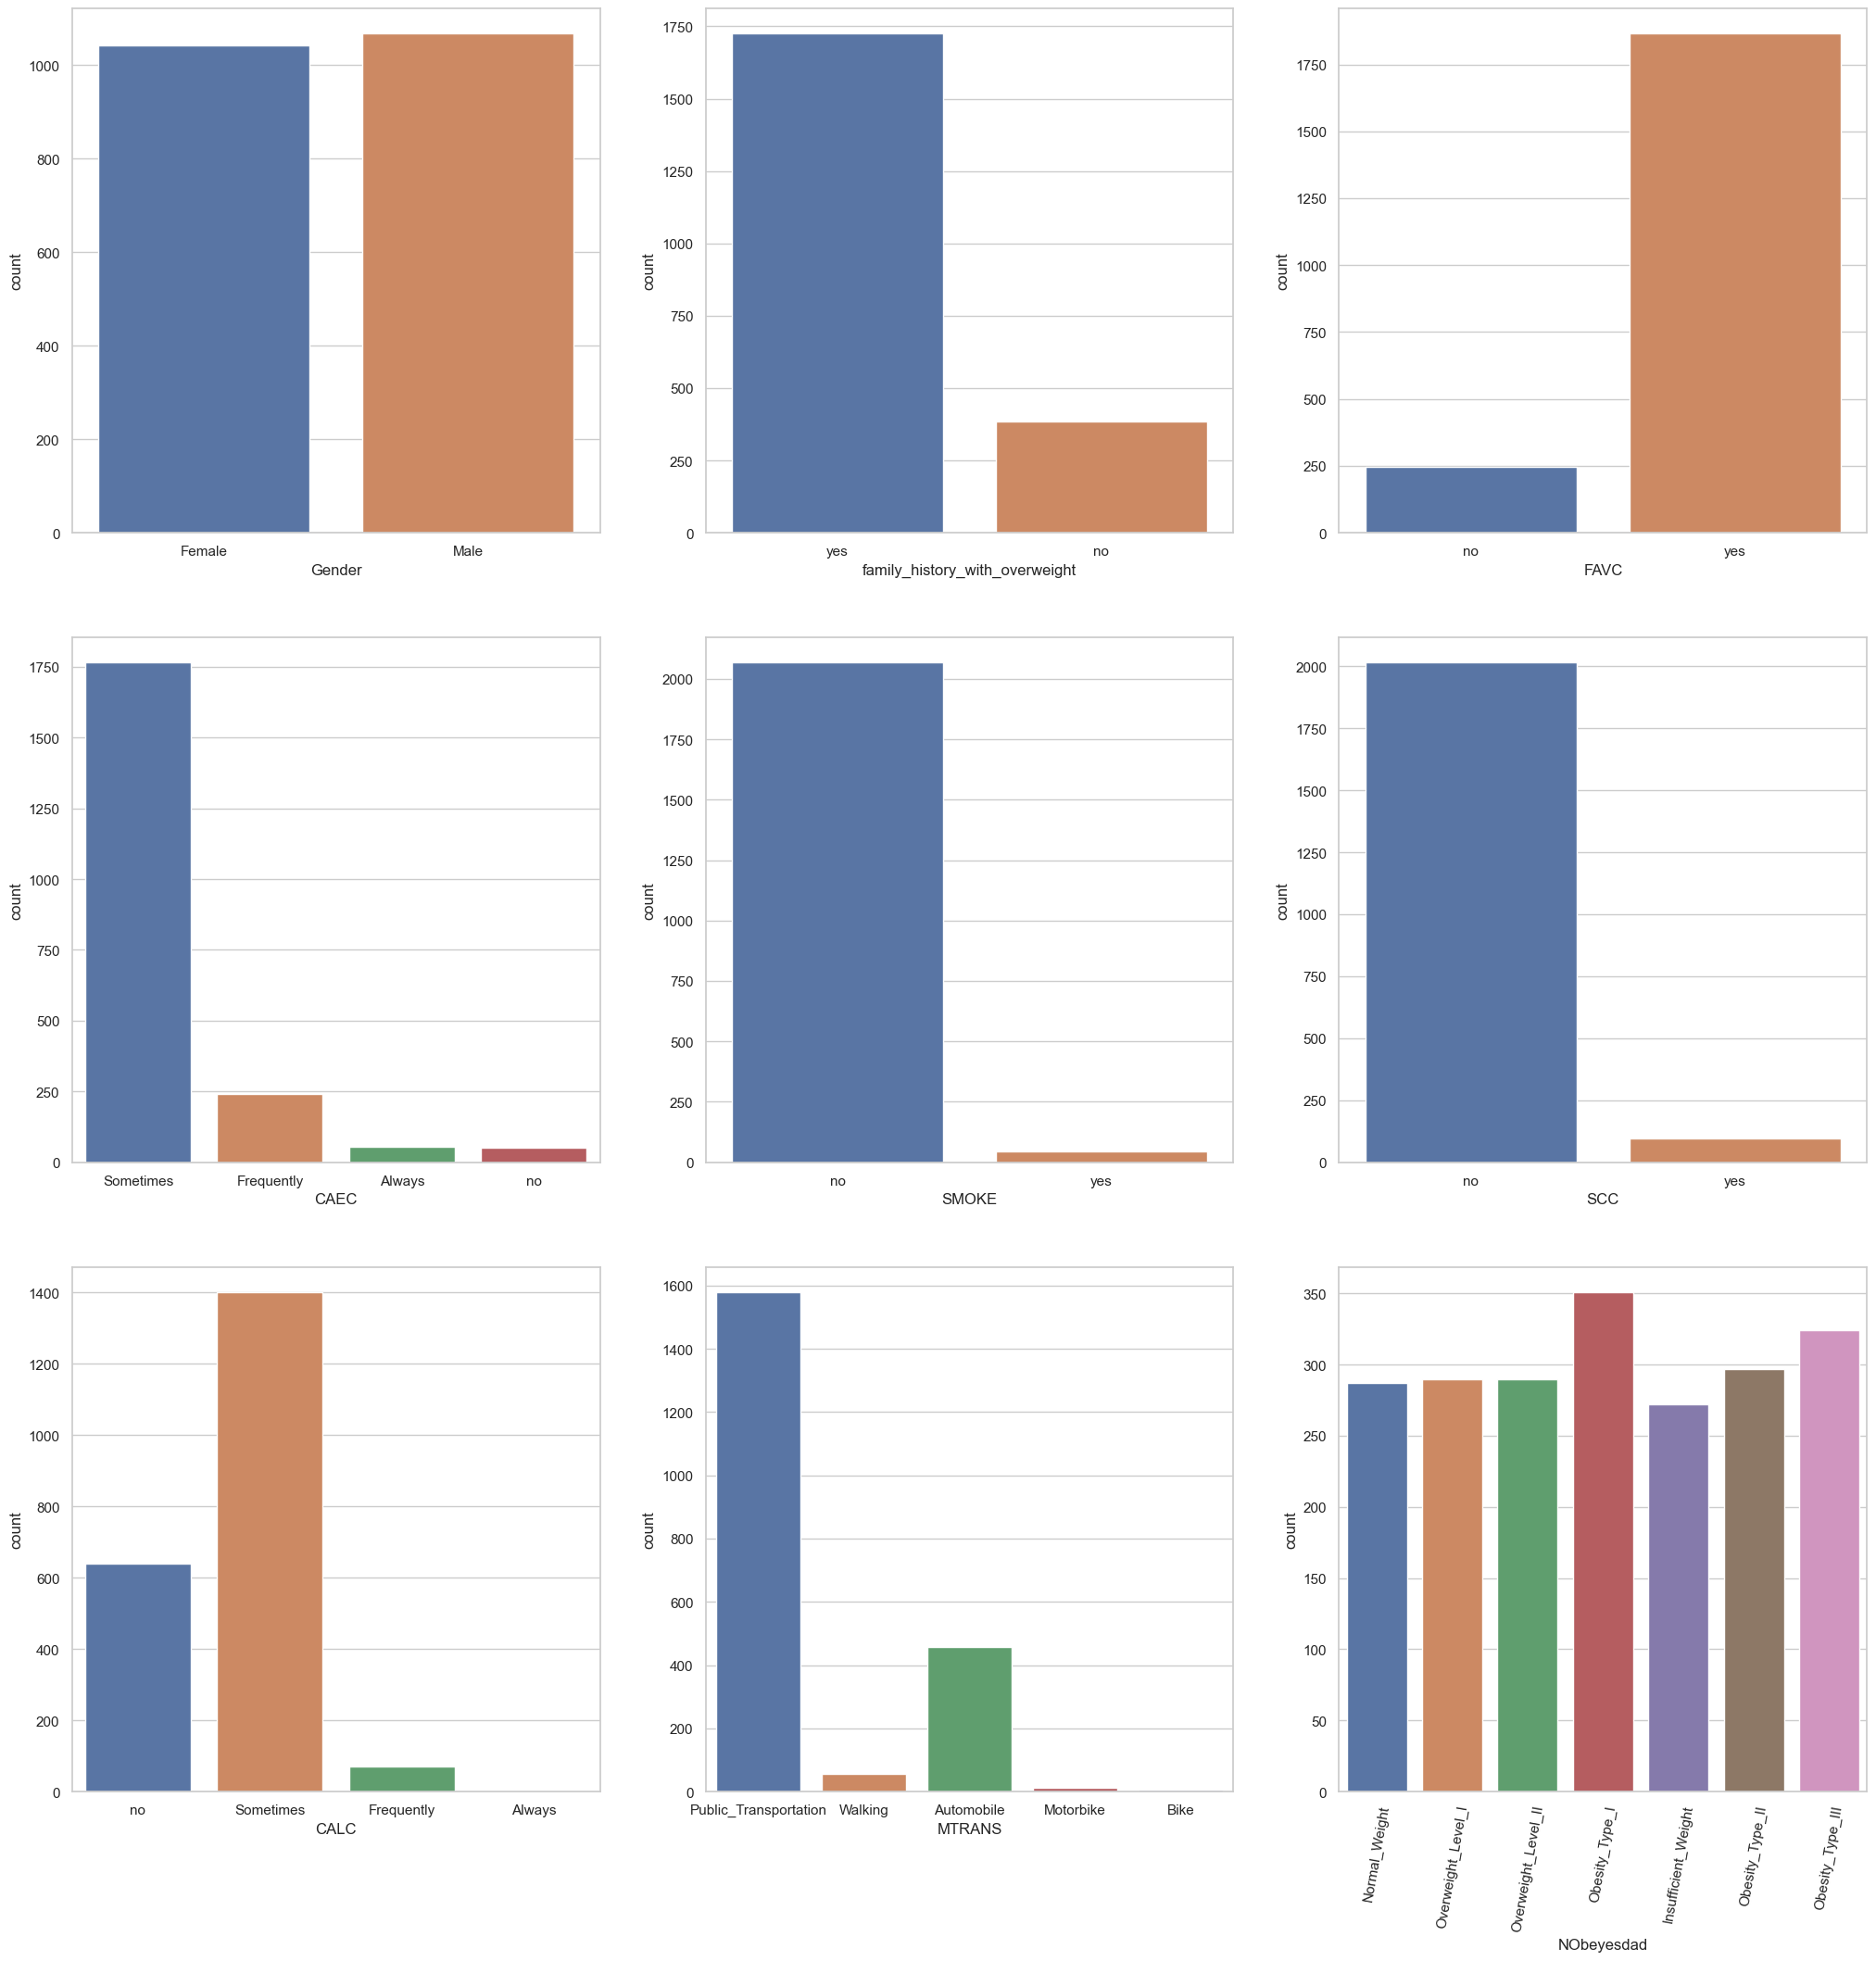

In [5]:
# univariate graphs - for non-numeric (i.e., graphs based on single variable)
nCols=3   
nRows=(len(cat_columns)-1)//nCols+1

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    axis=axes.flatten()[ind]
    sns.countplot(x=col,data=df,ax=axis)
axis.set_xticklabels(axis.get_xticklabels(), rotation=80)
plt.show()


# Purpose of the Figure
## Visualize Categorical Distributions:
Each plot displays the frequency of categories within a single non-numeric variable, allowing for clear comparisons of different groups.
## Identify Trends and Patterns:
By visualizing categorical data, you can easily identify common trends, such as the prevalence of certain categories (e.g., gender distribution, family history of overweight).
## Facilitate Data Interpretation:
These plots simplify the understanding of how categorical variables are distributed in the dataset, making it easier to draw conclusions about demographic and lifestyle factors.


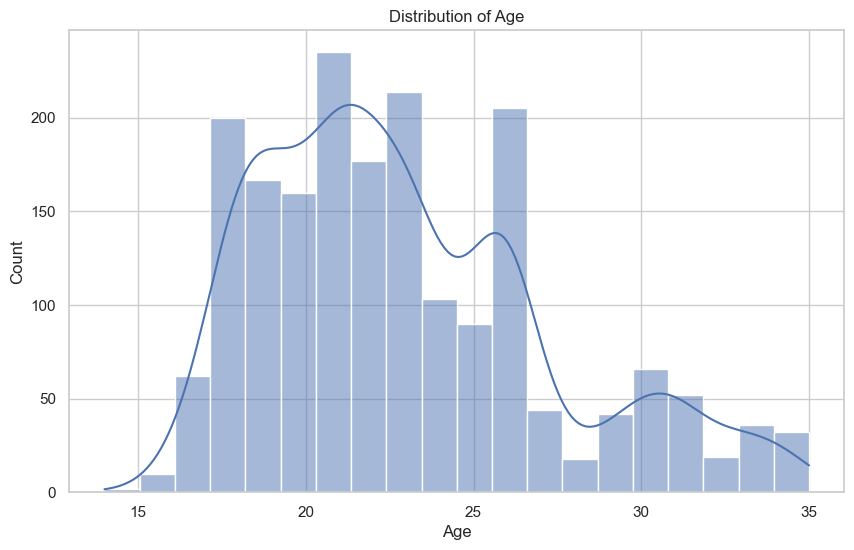

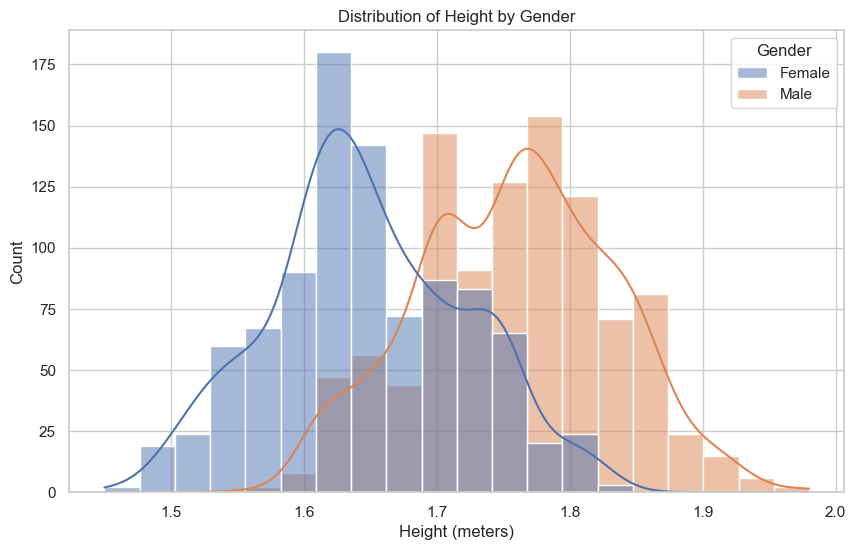

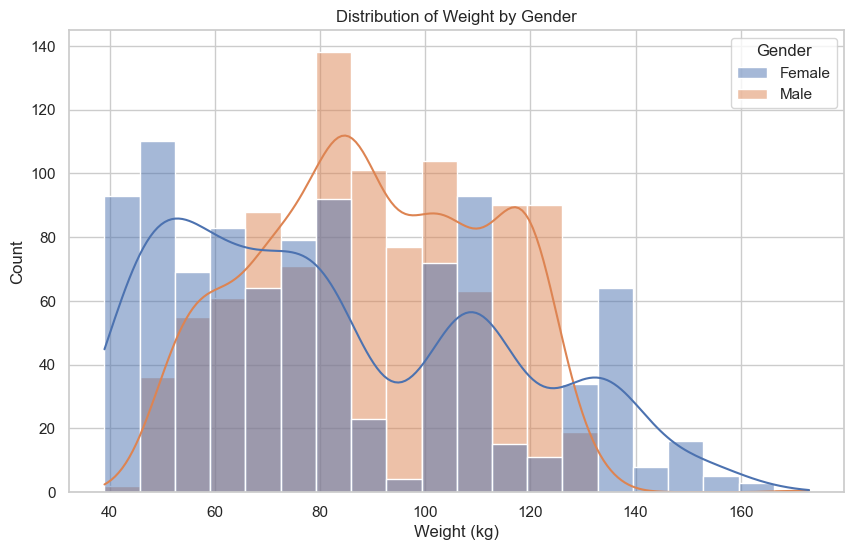

In [28]:
# univariate graphs - for numeric (i.e., graphs based on single variable)


import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualizations
sns.set(style="whitegrid")

# First plot: Age distribution without hue (kde=True, y-axis based on count)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Second plot: Height distribution with hue (Gender) (kde=True, y-axis based on count)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Height', kde=True, bins=20, hue='Gender')
plt.title('Distribution of Height by Gender')
plt.xlabel('Height (meters)')
plt.ylabel('Count')
plt.show()

# Third plot: Weight distribution with hue (Gender) (kde=True, y-axis based on count)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Weight', kde=True, bins=20, hue='Gender')
plt.title('Distribution of Weight by Gender')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()


# Purpose of the Figures

## Age Distribution:
Objective: Visualize the distribution of ages within the dataset.

Insight: Helps identify the age range of participants and understand age-related trends.
## Height Distribution by Gender:
Objective: Compare the height distributions of different genders.

Insight: Reveals any significant differences in height between males and females, which can be relevant for health assessments.
## Weight Distribution by Gender:
Objective: Analyze the weight distribution across genders.

Insight: Similar to height, this plot helps highlight differences in weight between males and females, aiding in understanding obesity trends.



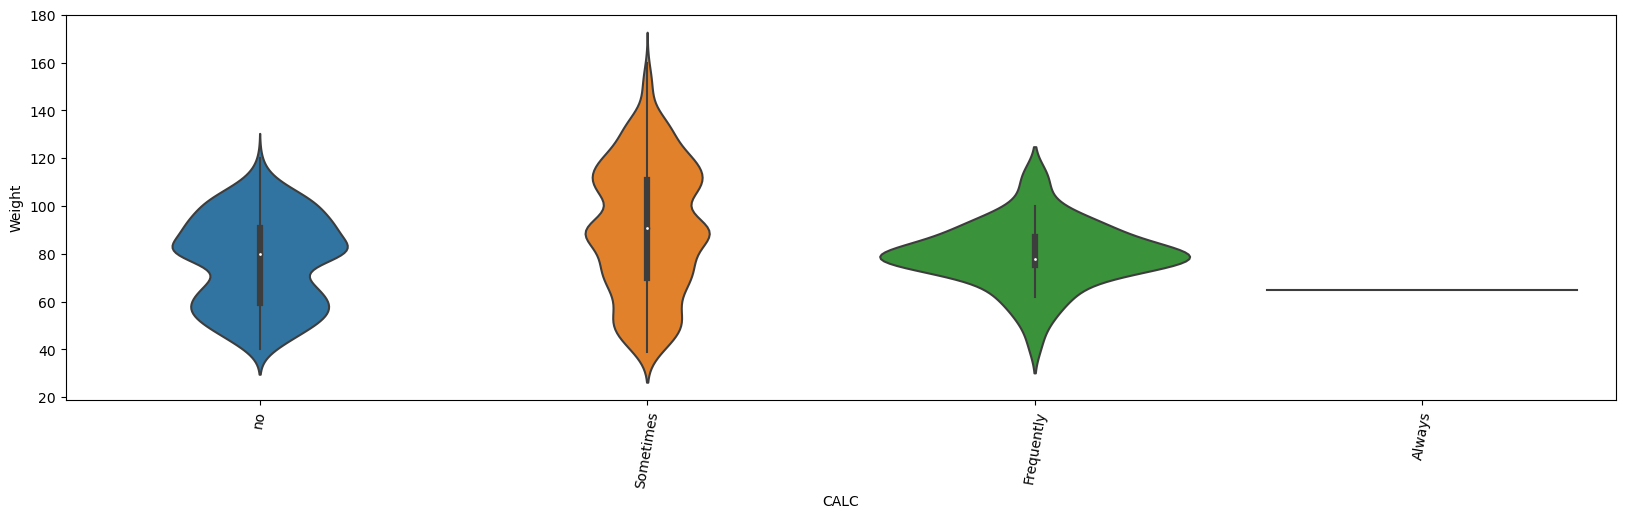

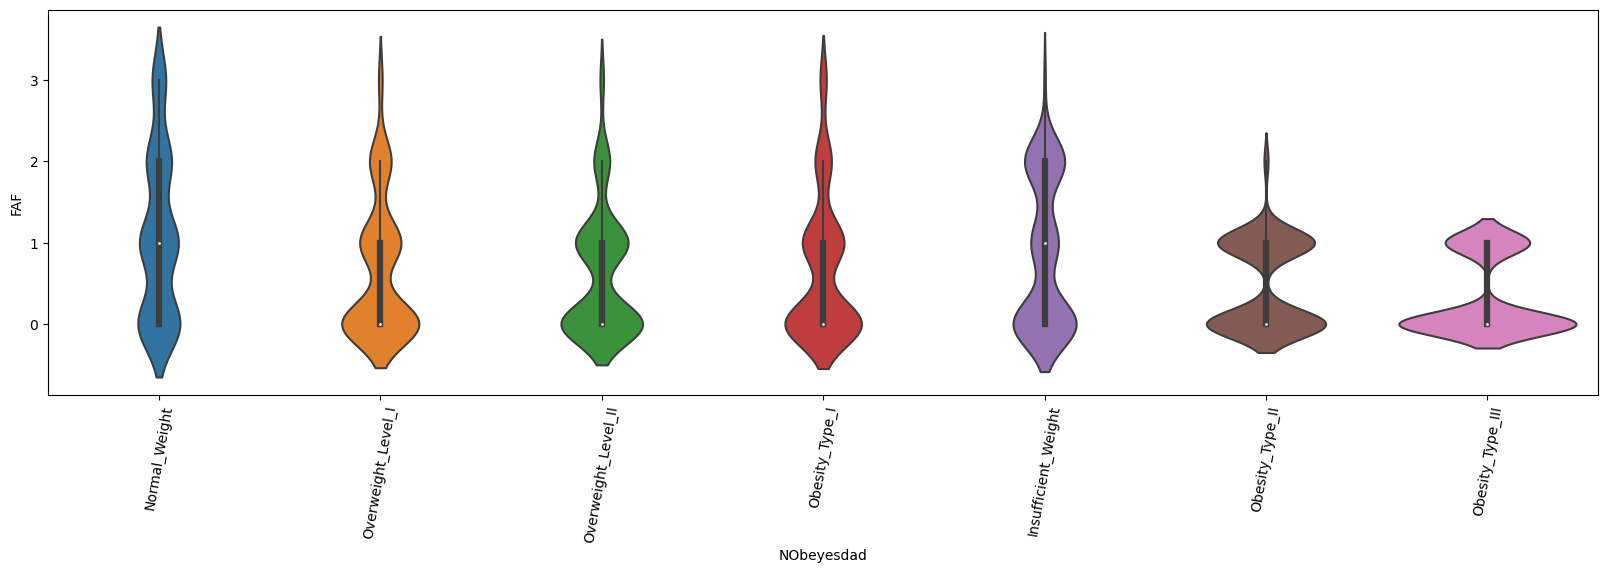

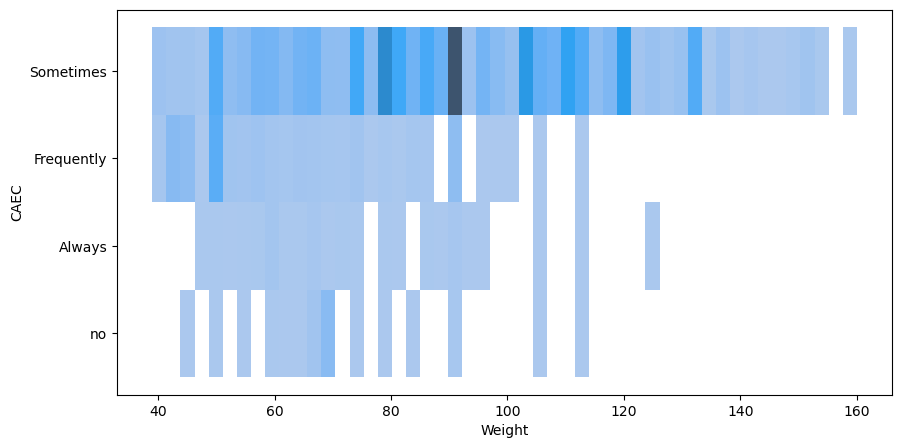

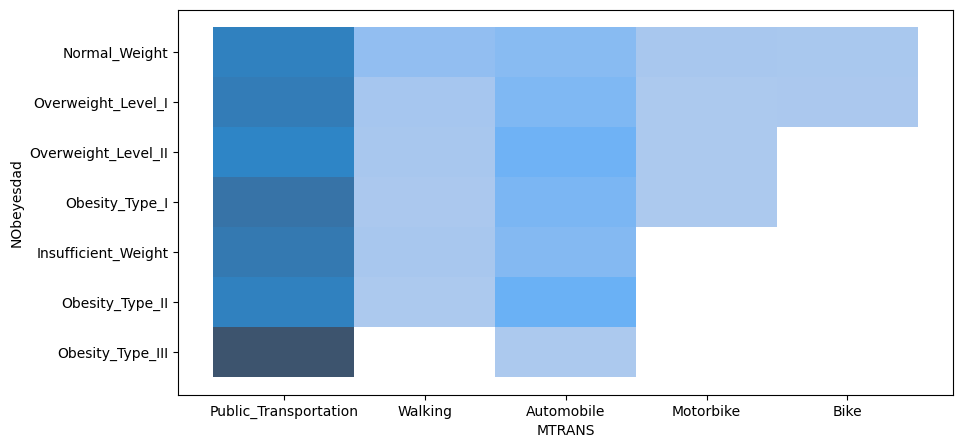

In [40]:
#Prepare bivariate plots (i.e., plots based on two variables).

#A boxplot plot of *Weight* vs *CALC* columns.
plt.figure(figsize=(20,5))
sns.violinplot(y='Weight',x='CALC',data=df);
plt.xticks(rotation=80)
plt.show()

#A violinplot plot of *FAF* vs *NObeyesdad* columns.
plt.figure(figsize=(20,5))
sns.violinplot(y='FAF',x='NObeyesdad',data=df);
plt.xticks(rotation=80)
plt.show()

#Draw a bivariate histogram for *Weight* and *CAEC* columns.
plt.figure(figsize=(10,5))
sns.histplot(x='Weight', y='CAEC', bins=50, data=df)
plt.show()

#Draw a bivariate histogram for *MTRANS* and *NObeyesdad* columns.
plt.figure(figsize=(10,5))
sns.histplot(x='MTRANS', y='NObeyesdad', bins=50, data=df)
plt.show()

# Purpose of the Figures
## 1.Violin Plot of Weight vs CALC:
Displays the distribution of weights across different categories in the CALC column.

The y axis shows weight, and the x axis shows categories from CALC.
## 2.Violin Plot of FAF vs NObeyesdad:
Shows the distribution of the FAF (physical activity frequency) across different obesity levels indicated by NObeyesdad.
## 3.Bivariate Histogram of Weight and CAEC:
Illustrates the relationship between Weight and CAEC (food consumption habits), with density represented by the bin counts.
## 4.Bivariate Histogram of MTRANS and NObeyesdad:
Displays the relationship between the mode of transportation (MTRANS) and obesity levels (NObeyesdad).





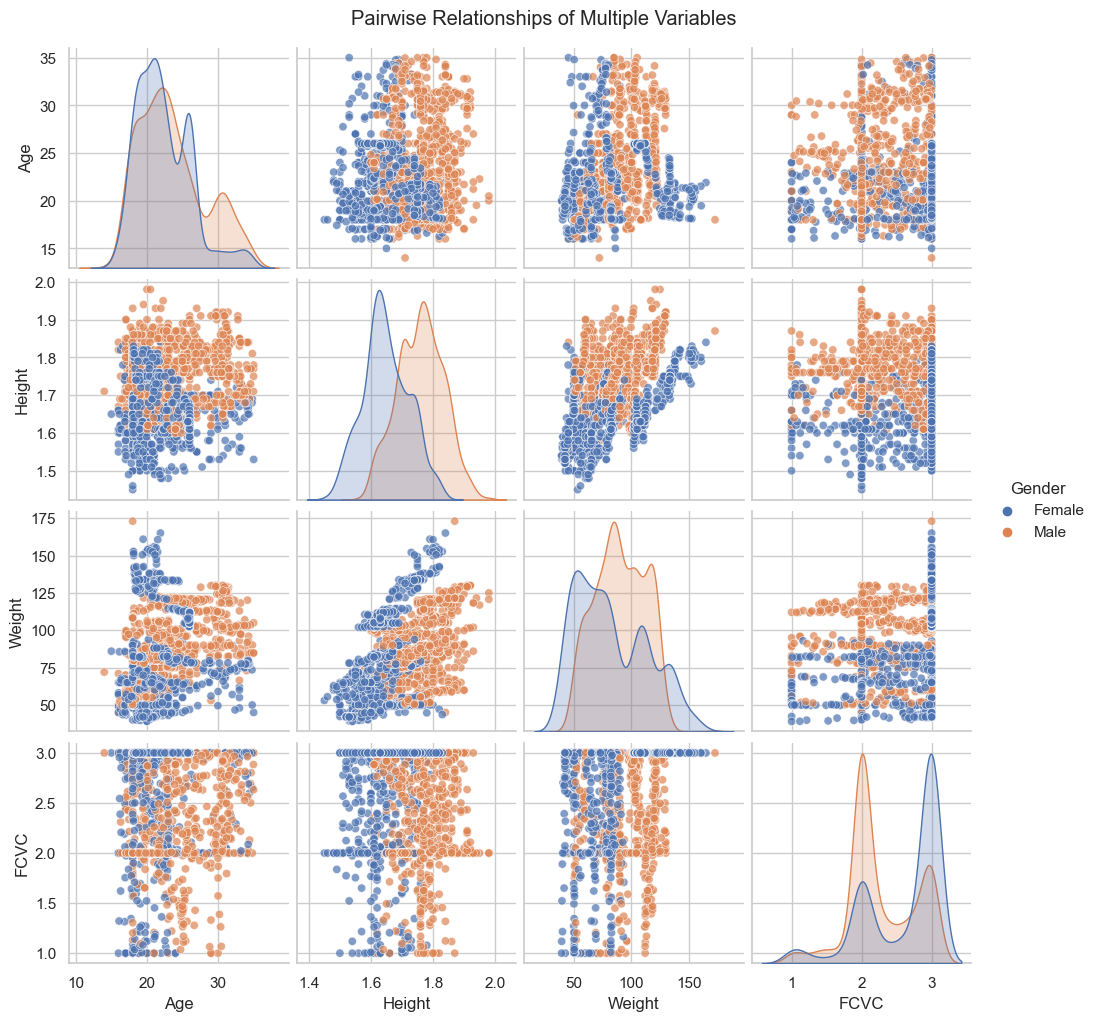

In [29]:
#Portray advance graphs (i.e., graphs based on more than two variables).
# Pairplot with multiple numeric variables

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=['Age', 'Height', 'Weight', 'FCVC'], hue='Gender', diag_kind='kde', plot_kws={'alpha': 0.7})

plt.suptitle('Pairwise Relationships of Multiple Variables', y=1.02)
plt.show()

# Purpose of the Pairplot
## Visualize Relationships:
It displays pairwise relationships between multiple numeric variables (Age, Height, Weight, FCVC) in a single grid, allowing for easy comparison.
## Identify Trends:
By using different colors for genders, the plot helps to identify trends and patterns in how these variables relate to each other across different demographic groups.
## Assess Distributions:
The diagonal plots (using KDE) show the distribution of each variable, providing insights into their individual characteristics.
## Highlight Correlations:
The scatter plots reveal correlations between pairs of variables, indicating how changes in one variable may relate to changes in another.


In [30]:
#Assess the relationship between variables.

ndf = pd.DataFrame(df)
ndf.drop(columns = ['Weight','Age','Height'], inplace = True)
ndf = pd.get_dummies(ndf, columns = ['family_history_with_overweight','Gender','FAVC','SMOKE', 'SCC'], drop_first = True)
mapping = {'no':1, 'Sometimes':2, 'Frequently':3, 'Always':4}
ndf['CALC'] = ndf['CALC'].map(mapping)
ndf['CAEC'] = ndf['CAEC'].map(mapping)

MTRANS_mapping = {'Walking': 1, 'Bike':2, 'Motorbike':3, 'Automobile': 4, 'Public_Transportation':5}
ndf['MTRANS'] = ndf['MTRANS'].map(MTRANS_mapping)
NObeyesdad_mapping = {"Insufficient_Weight":1,'Normal_Weight':2, 'Overweight_Level_I':3, 'Overweight_Level_II':4, 'Obesity_Type_I':5,'Obesity_Type_II':6, 'Obesity_Type_III':7}
ndf['NObeyesdad'] = ndf['NObeyesdad'].map(NObeyesdad_mapping)

NObeyesdad = ndf.pop('NObeyesdad')
ndf = pd.concat([ndf, NObeyesdad], axis=1)

corr = ndf.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=4)


## What do we conclude?


1- The highest correlation is between family_history_with_overweight_yes and NObeyesdad which is 0.5051 and this suggest some correlation with positive direction.


2- The lowest correlation is between SMOKE_yes and NObeyesdad which is 0.0034 and suggest no correlation with positive direction

**The summary of our findings:**

The age of the individuals is approximately between 20 and 30 years.

Most of the records have a family history of obesity.

Most records use public transportation.

People who usually engage in physical activity have a normal weight, in contrast, people who do not exercise have the third level of obesity.

People who do not have a fixed daily routine regarding food consumption between meals suffer from weight disorders.

People who have a family history of obesity have more weight than others, and if they eat food with high calories, they weigh more.

On the other hand, people who do not have a family history of obesity not only have less weight than those who do, but also their weight doesn't excessively vary whether or not they eat high-calorie food.

In [145]:
pca_df=df
pca_df['NObeyesdad'].unique().tolist()
output_mapping={ 'Insufficient_Weight':1, 'Normal_Weight':2, 'Overweight_Level_I':3, 'Overweight_Level_II':4,
                'Obesity_Type_I':5, 'Obesity_Type_II':6, 'Obesity_Type_III':7 } 
pca_df['NObeyesdad']=pca_df['NObeyesdad'].map(output_mapping)
pca_df.head()
#ndf.info()

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

   NObeyesdad  
0           2  
1           2  
2           2  
3           3  
4           4

In [147]:
#PCA

num_columns = pca_df.select_dtypes(exclude='object').columns # it also exclude the output
pca_input_columns = num_columns.drop(['NObeyesdad'])

from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

principalComponents = pca.fit_transform(pca_df[pca_input_columns]) 

pca_df['pca1'] = principalComponents[:,0]
pca_df['pca2'] = principalComponents[:,1]

for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')

The variance captured by pca 1 is:  94.39%
The variance captured by pca 2 is:  5.29%


In [151]:
pca_1_coefficients=np.round(pca.components_[0],4)

zipList=list(zip(pca_input_columns,pca_1_coefficients))
ndf1=pd.DataFrame.from_records(zipList,columns=['field','coeff'])

display(ndf1.sort_values(by=['coeff'], ascending=False))  

#Weight has the highest coefficient

field   coeff
2  Weight  0.9986
0     Age  0.0519
5    CH2O  0.0047
3    FCVC  0.0044
4     NCP  0.0032
1  Height  0.0016
6     FAF -0.0017
7     TUE -0.0017

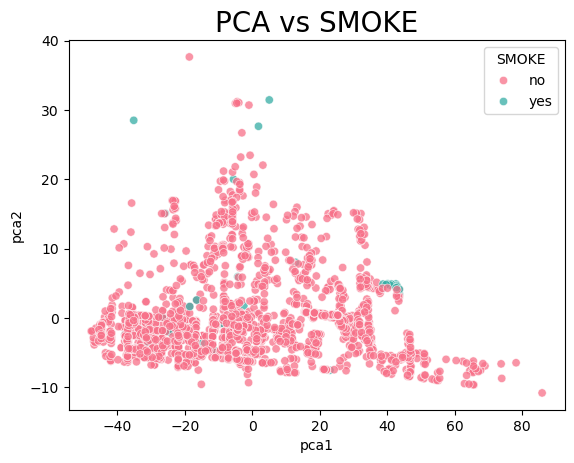

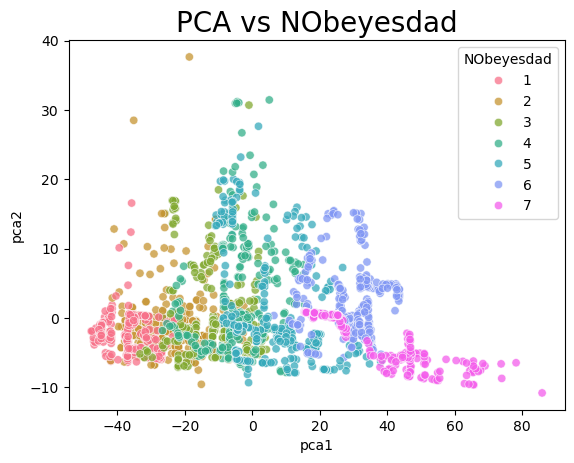

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='SMOKE', palette=sns.color_palette("husl", pca_df['SMOKE'].nunique()),
            alpha=0.75,
            data=pca_df)
plt.title('PCA vs SMOKE', fontsize = 20)
plt.show()


plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='NObeyesdad', palette=sns.color_palette("husl", pca_df['NObeyesdad'].nunique()),
            alpha=0.75,
            data=pca_df)
plt.title('PCA vs NObeyesdad', fontsize = 20)
plt.show()

## The PCAs show good separation, with some overlap.

## **Model Building**.

In [155]:
from sklearn.model_selection import train_test_split
X = ndf.drop('NObeyesdad',axis=1).values
y = ndf['NObeyesdad'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [157]:
# Tree
from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree:")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

## GaussianNB
from sklearn.naive_bayes import GaussianNB
NBClf2 = GaussianNB()   
NBClf2.fit(X_train,y_train)
NB_y_pred = NBClf2.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("*"*30)
print("\nGaussianNB:")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

from sklearn.naive_bayes import CategoricalNB 
NBClf = CategoricalNB(alpha=1.0e-10, class_prior=None, fit_prior=True)  
NBClf.fit(X_train,y_train)
NB_y_pred = NBClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("\nCategoricalNB:")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

Decision Tree:
Accuracy:= 0.7239747634069401
Confusion Matrix:= 
 [[72 10  7  1  3  0  1]
 [ 5 50 14  5 14  4  0]
 [ 8  8 63  8  5  6  0]
 [ 3  9  6 39 14  4  0]
 [ 1  5  2 15 66  3  0]
 [ 0  0  3  8  2 79  0]
 [ 0  0  0  1  0  0 90]]
******************************

GaussianNB:
Accuracy:= 0.4022082018927445
Confusion Matrix:= 
 [[87  4  0  0  0  3  0]
 [75 12  0  0  0  5  0]
 [77  6  0  0  0 15  0]
 [56  3  0  0  0 16  0]
 [72  2  0  0  1 17  0]
 [27  0  0  0  0 65  0]
 [ 1  0  0  0  0  0 90]]

CategoricalNB:
Accuracy:= 0.5583596214511041
Confusion Matrix:= 
 [[54 12  6  0 16  6  0]
 [28 43  8  2  7  4  0]
 [ 9  9 23  5 33 19  0]
 [ 3 11  1 12 30 18  0]
 [ 3  9  2  2 56 20  0]
 [ 0  2  0  0 14 76  0]
 [ 0  0  0  1  0  0 90]]


**After studying two models,**
Decision Tre and 
Naive Baye

We found that decision tree has a higer accuracy.

Also, from both methods it is shown in the Confusion Matrix that there are some differences between the actual and predicted value
s


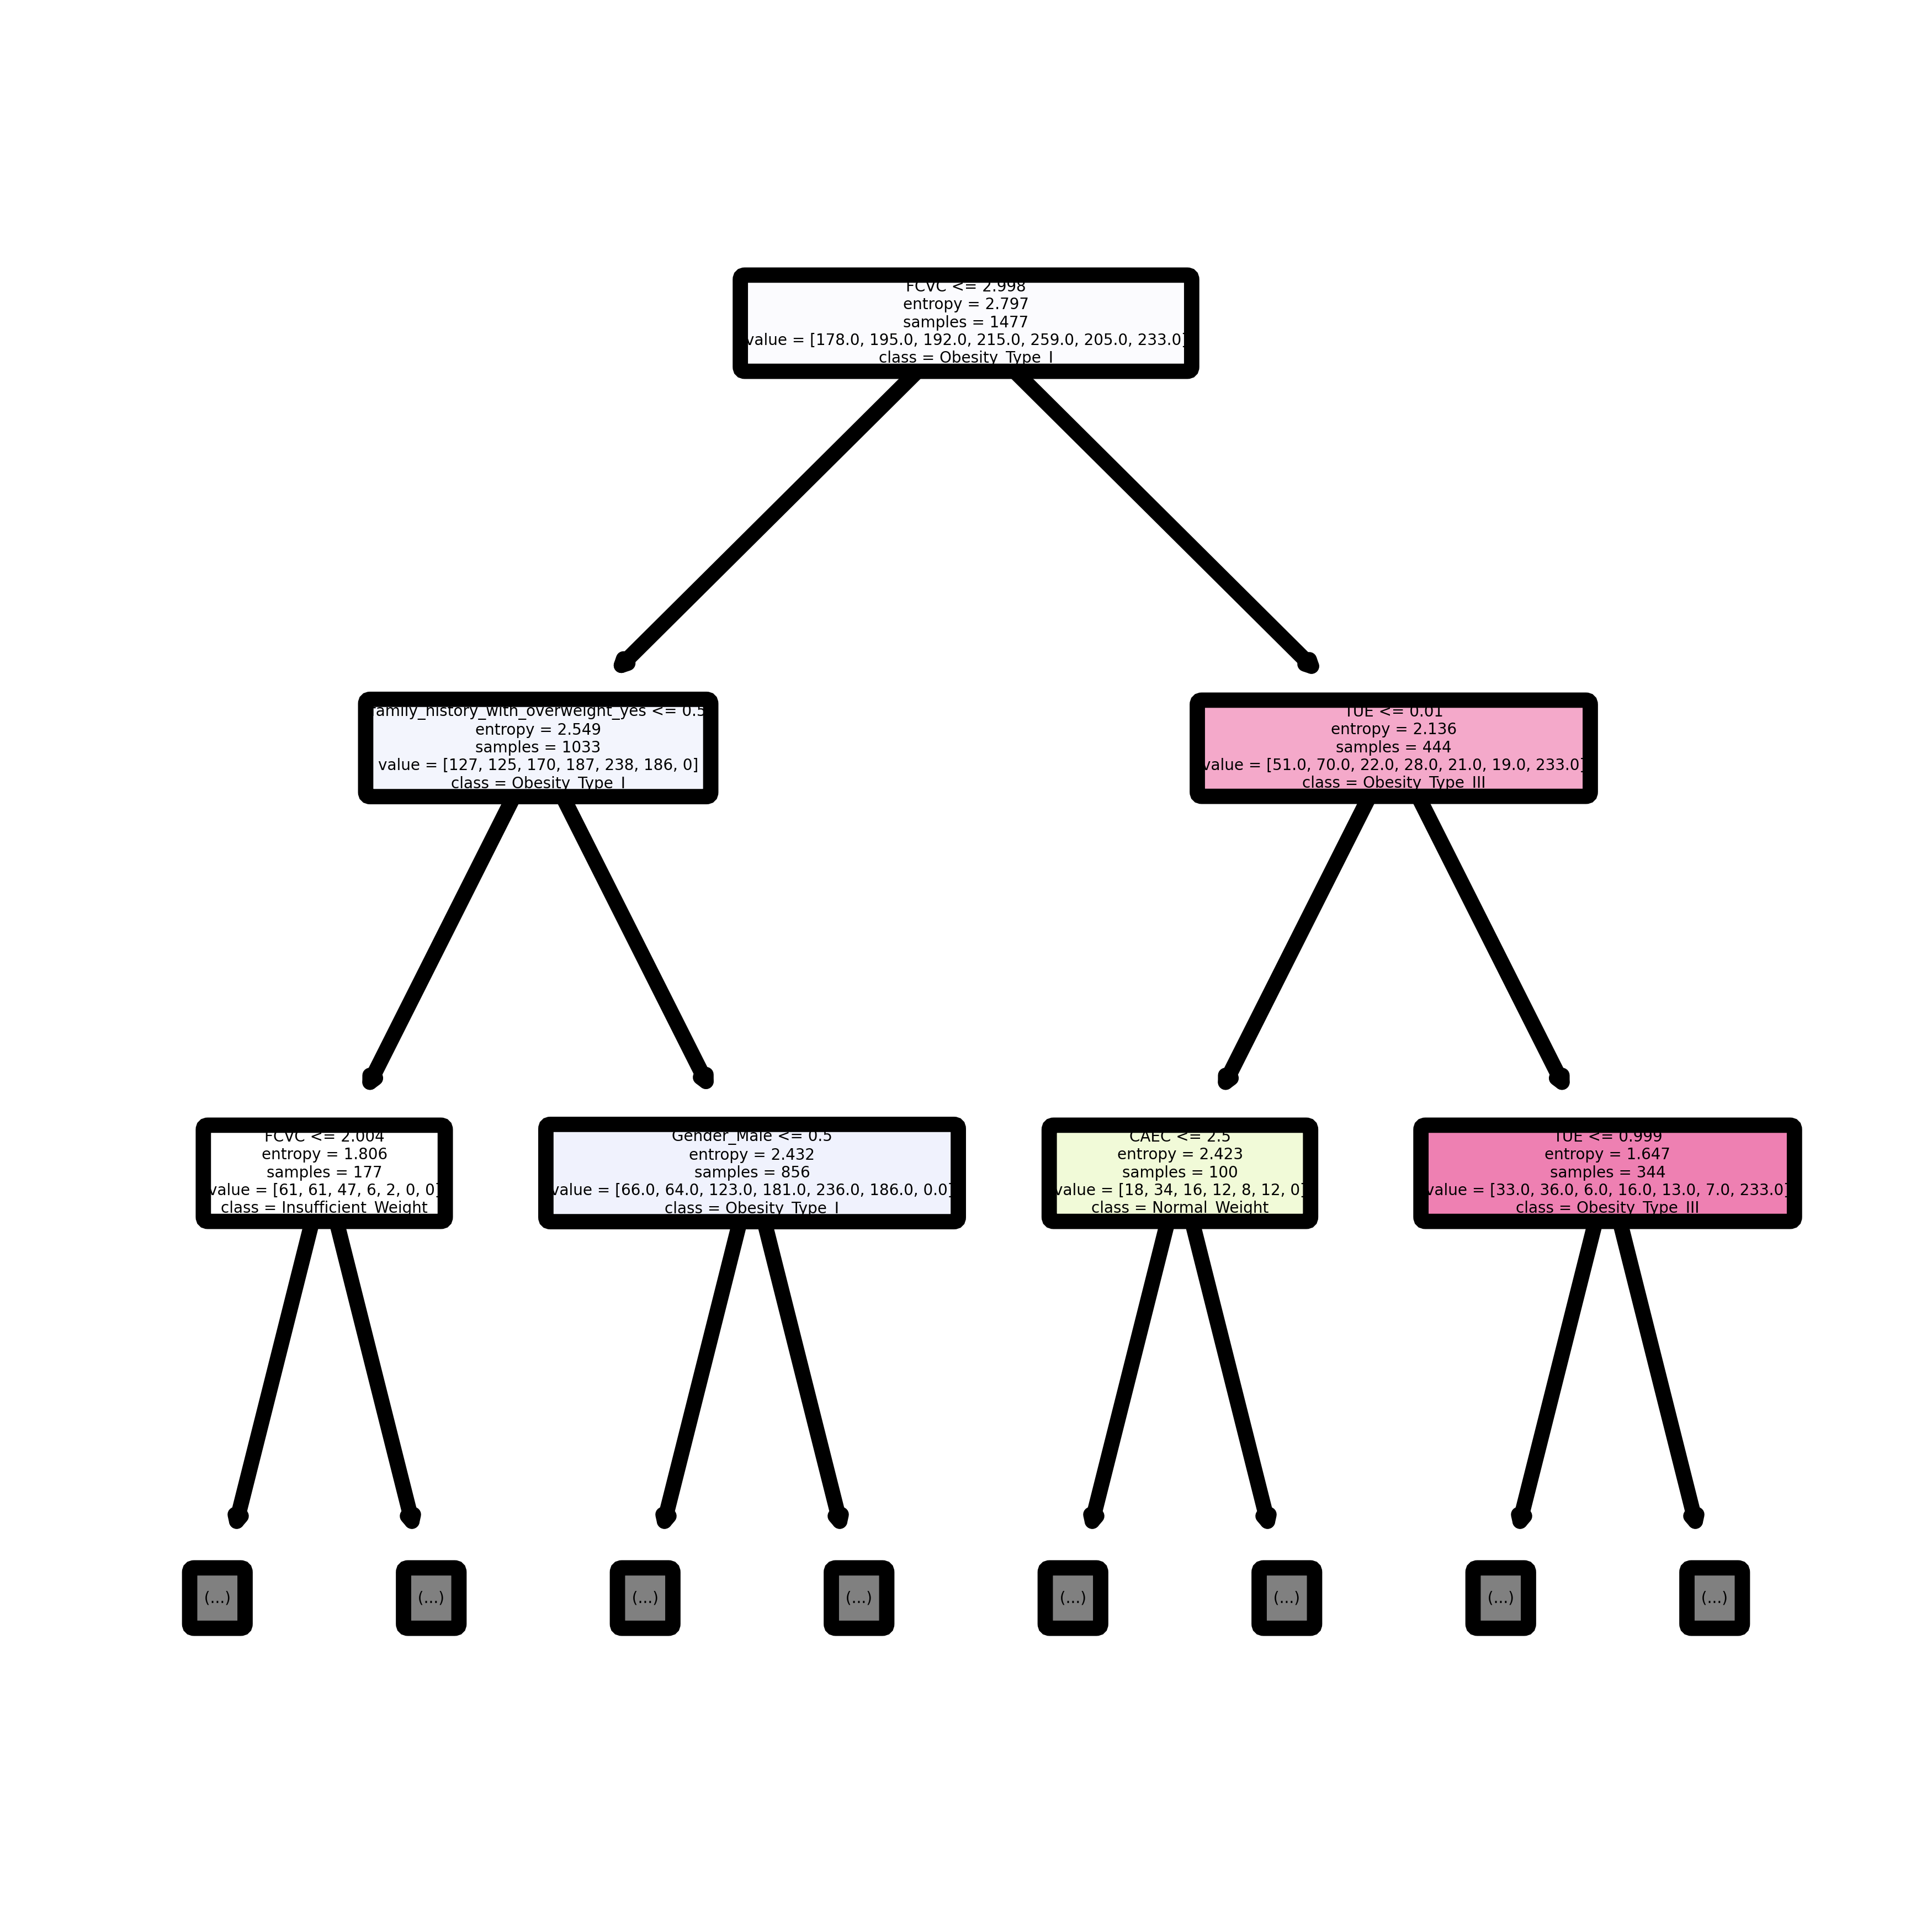

In [207]:
# Decision Tree
import matplotlib.pyplot as plt
plt.figure(figsize =(2,2),dpi=2000)
tree.plot_tree(dtClf,feature_names=ndf.columns[:-1].tolist(),class_names=['Insufficient_Weight','Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III'],
               filled=True,rounded=True,max_depth=2); #
plt.show()

## Communicating the Results:


**Summary**


We built a decision tree that predicts the weight category of an individual based on various input features such as their food consumption.


The weight categories include Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

 
For example, if a woman drives her car and consumes vegetables on a regular basis, she also drinks alcohol, eats three main meals per day, spends less than two hours per day using technological devices such as a cell phone or videogames, and engages in physical activities twice a week, and no one in her family is obese. We predict that this woman will be diagnosed with Overweight Level I



**Possible future recommendation**

Economic Analysis: Examining the economic impact of obesity, including healthcare costs, lost productivity, and other indirect costs, to highlight the importance of prevention and intervention.
.


## Operationalization:

General Guidelines for Adopting Classification:

Define the Problem,

Prepare Data,

Modul planinng and buliding

Problems and Issues in the Implementation of Classification:

Overfitting,

Underfitting,

Imbalanced Classes

